In [1]:
import pathlib
import os

import pandas as pd

import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import mapclassify

In [2]:
import pymysql

In [3]:
db = pymysql.connect(host='localhost',
                     user='root',
                     password='password',
                     database='chicago')
cursor = db.cursor()

In [6]:
sqlcom ="SELECT * FROM weekend_morningPeak"
df= pd.read_sql(sqlcom, con=db)
print(df)

            node_id         lat         lon            timestamp value_hrf
0      001e0610ee43   41.788608  -87.598713  2019/10/05 04:00:01     66.26
1      001e061146ba    41.96759   -87.76257  2019/10/05 04:00:01     62.74
2      001e0610ba13   41.751238   -87.71299  2019/10/05 04:00:03     56.72
3      001e0610ba46   41.878377  -87.627678  2019/10/05 04:00:04     56.72
4      001e061146cb  41.9140942  -87.683022  2019/10/05 04:00:04     56.72
...             ...         ...         ...                  ...       ...
40431  001e0611462f   41.823527  -87.641054  2019/10/06 08:59:55      55.0
40432  001e061130f4   41.896157  -87.662391  2019/10/06 08:59:57     56.72
40433  001e06113ad8   41.866786  -87.666306  2019/10/06 08:59:57     56.72
40434  001e0611441e   41.808594  -87.665048  2019/10/06 08:59:58     56.72
40435  001e0611850f   41.692837  -87.613419  2019/10/06 08:59:59     62.74

[40436 rows x 5 columns]


In [7]:
# dateArr=[['2019/09/30 07','2019/09/30 09'],
#          ['2019/10/01 07','2019/10/01 09'],
#          ['2019/10/02 07','2019/10/02 09'],
#          ['2019/10/03 07','2019/10/03 09'],
#          ['2019/10/04 07','2019/10/04 09']]
# dataArr=[]
# for item in dateArr:
#     sqlcom ="SELECT sound_node.node_id,sound_node.lat,sound_node.lon,delsound.timestamp,delsound.value_hrf FROM delsound,sound_node WHERE delsound.node_id=sound_node.node_id and TIMESTAMP between '"+item[0]+"%' and '"+item[1]+"%'" 
#     print(sqlcom)
#     df= pd.read_sql(sqlcom, con=db)
#     print(df)


In [8]:
from decimal import Decimal
dict={}
for i in range(0,len(df)):
    key=df.iloc[i]['node_id']
    lat=df.iloc[i]['lat']
    lon=df.iloc[i]['lon']
    value=float(df.iloc[i]['value_hrf'])
    
    if key in dict:
        tempDict=dict.get(key)
        valueTemp=tempDict["value"]
        valueTemp.append(value)
        dict[key]=tempDict 
    else:
        dict[key]={"value":[value],"lon":lon,"lat":lat}

temp={}
for key in dict:
    tempDict=dict.get(key)
#     tempDict['average']=Decimal(np.mean(tempDict["value"])).quantize(Decimal('0.00'))
    tempDict['average']=np.mean(tempDict["value"])
    temp[key]=tempDict
print(temp)

{'001e0610ee43': {'value': [66.26, 62.74, 66.26, 62.74, 62.74, 66.26, 66.26, 66.26, 66.26, 56.72, 66.26, 66.26, 66.26, 66.26, 66.26, 62.74, 62.74, 66.26, 66.26, 62.74, 66.26, 56.72, 56.72, 56.72, 66.26, 66.26, 62.74, 66.26, 66.26, 56.72, 62.74, 66.26, 62.74, 62.74, 62.74, 62.74, 62.74, 56.72, 62.74, 62.74, 62.74, 66.26, 62.74, 66.26, 62.74, 66.26, 66.26, 62.74, 62.74, 62.74, 62.74, 66.26, 62.74, 62.74, 62.74, 62.74, 62.74, 66.26, 62.74, 66.26, 62.74, 66.26, 62.74, 66.26, 56.72, 62.74, 62.74, 66.26, 56.72, 66.26, 56.72, 62.74, 62.74, 66.26, 66.26, 62.74, 62.74, 62.74, 66.26, 62.74, 66.26, 62.74, 62.74, 56.72, 56.72, 62.74, 56.72, 66.26, 66.26, 66.26, 66.26, 66.26, 66.26, 62.74, 66.26, 62.74, 62.74, 62.74, 56.72, 66.26, 62.74, 56.72, 62.74, 62.74, 62.74, 56.72, 62.74, 62.74, 56.72, 62.74, 62.74, 66.26, 62.74, 66.26, 62.74, 62.74, 62.74, 66.26, 66.26, 66.26, 62.74, 62.74, 62.74, 56.72, 66.26, 62.74, 56.72, 62.74, 62.74, 56.72, 66.26, 62.74, 62.74, 66.26, 66.26, 66.26, 62.74, 62.74, 56.72,

In [9]:
df=pd.DataFrame.from_dict(temp,orient='index')
df

,value,lon,lat,average
001e0610ee43,"[66.26, 62.74, 66.26, 62.74, 62.74, 66.26, 66....",-87.598713,41.788608,61.802999
001e061146ba,"[62.74, 56.72, 56.72, 56.72, 56.72, 56.72, 56....",-87.76257,41.96759,56.361616
001e0610ba13,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56....",-87.71299,41.751238,56.770695
001e0610ba46,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56....",-87.627678,41.878377,60.140559
001e061146cb,"[56.72, 55.0, 56.72, 56.72, 56.72, 56.72, 56.7...",-87.683022,41.9140942,60.730618
001e06117b44,"[62.74, 62.74, 62.74, 66.26, 62.74, 62.74, 62....",-87.66263000000002,41.721301,60.695556
001e061183f5,"[62.74, 62.74, 62.74, 62.74, 62.74, 62.74, 62....",-87.62102,41.692703,60.826568
001e06113a24,"[56.72, 56.72, 56.72, 56.72, 55.0, 56.72, 56.7...",-87.597995,41.788979,56.924265
001e061144cd,"[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 56.72, 56...",-87.666599,41.8742,56.683300
001e06113ad8,"[56.72, 56.72, 56.72, 56.72, 56.72, 56.72, 56....",-87.666306,41.866786,56.756530


In [10]:
df.shape

(31, 4)

In [11]:
df['average']

001e0610ee43    61.802999
001e061146ba    56.361616
001e0610ba13    56.770695
001e0610ba46    60.140559
001e061146cb    60.730618
001e06117b44    60.695556
001e061183f5    60.826568
001e06113a24    56.924265
001e061144cd    56.683300
001e06113ad8    56.756530
001e0610bbe5    56.756963
001e0610e538    58.988696
001e06113ace    56.877028
001e0611441e    58.287556
001e0610ba15    56.655112
001e0610f732    63.273273
001e061144be    56.730260
001e06118295    59.163047
001e0610f05c    61.220199
001e06113107    56.488367
001e061130f4    57.918120
001e0610ee36    57.448073
001e0610bc10    87.298643
001e06113d20    56.834911
001e0611462f    56.404625
001e06113acb    58.034429
001e0610f6db    56.999485
001e0610f703    61.106696
001e06112e77    56.856202
001e061184a3    62.258400
001e0611850f    61.060229
Name: average, dtype: float64

In [12]:
df['lat'].astype(float)

001e0610ee43    41.788608
001e061146ba    41.967590
001e0610ba13    41.751238
001e0610ba46    41.878377
001e061146cb    41.914094
001e06117b44    41.721301
001e061183f5    41.692703
001e06113a24    41.788979
001e061144cd    41.874200
001e06113ad8    41.866786
001e0610bbe5    41.736495
001e0610e538    41.736593
001e06113ace    41.831070
001e0611441e    41.808594
001e0610ba15    41.722457
001e0610f732    41.895005
001e061144be    41.792543
001e06118295    41.820972
001e0610f05c    41.924903
001e06113107    41.751142
001e061130f4    41.896157
001e0610ee36    41.751295
001e0610bc10    41.736314
001e06113d20    41.892003
001e0611462f    41.823527
001e06113acb    41.839066
001e0610f6db    41.791329
001e0610f703    41.871480
001e06112e77    41.786756
001e061184a3    41.714021
001e0611850f    41.692837
Name: lat, dtype: float64

In [13]:
Chicago_Streets_Shapefiles = '.../street-chicago.shp'
Chicago_Boundary_Shapefile = '.../il-chicago.shp'

Text(0.5, 1.0, 'Sound level at morning peak in Chicago on weekend')

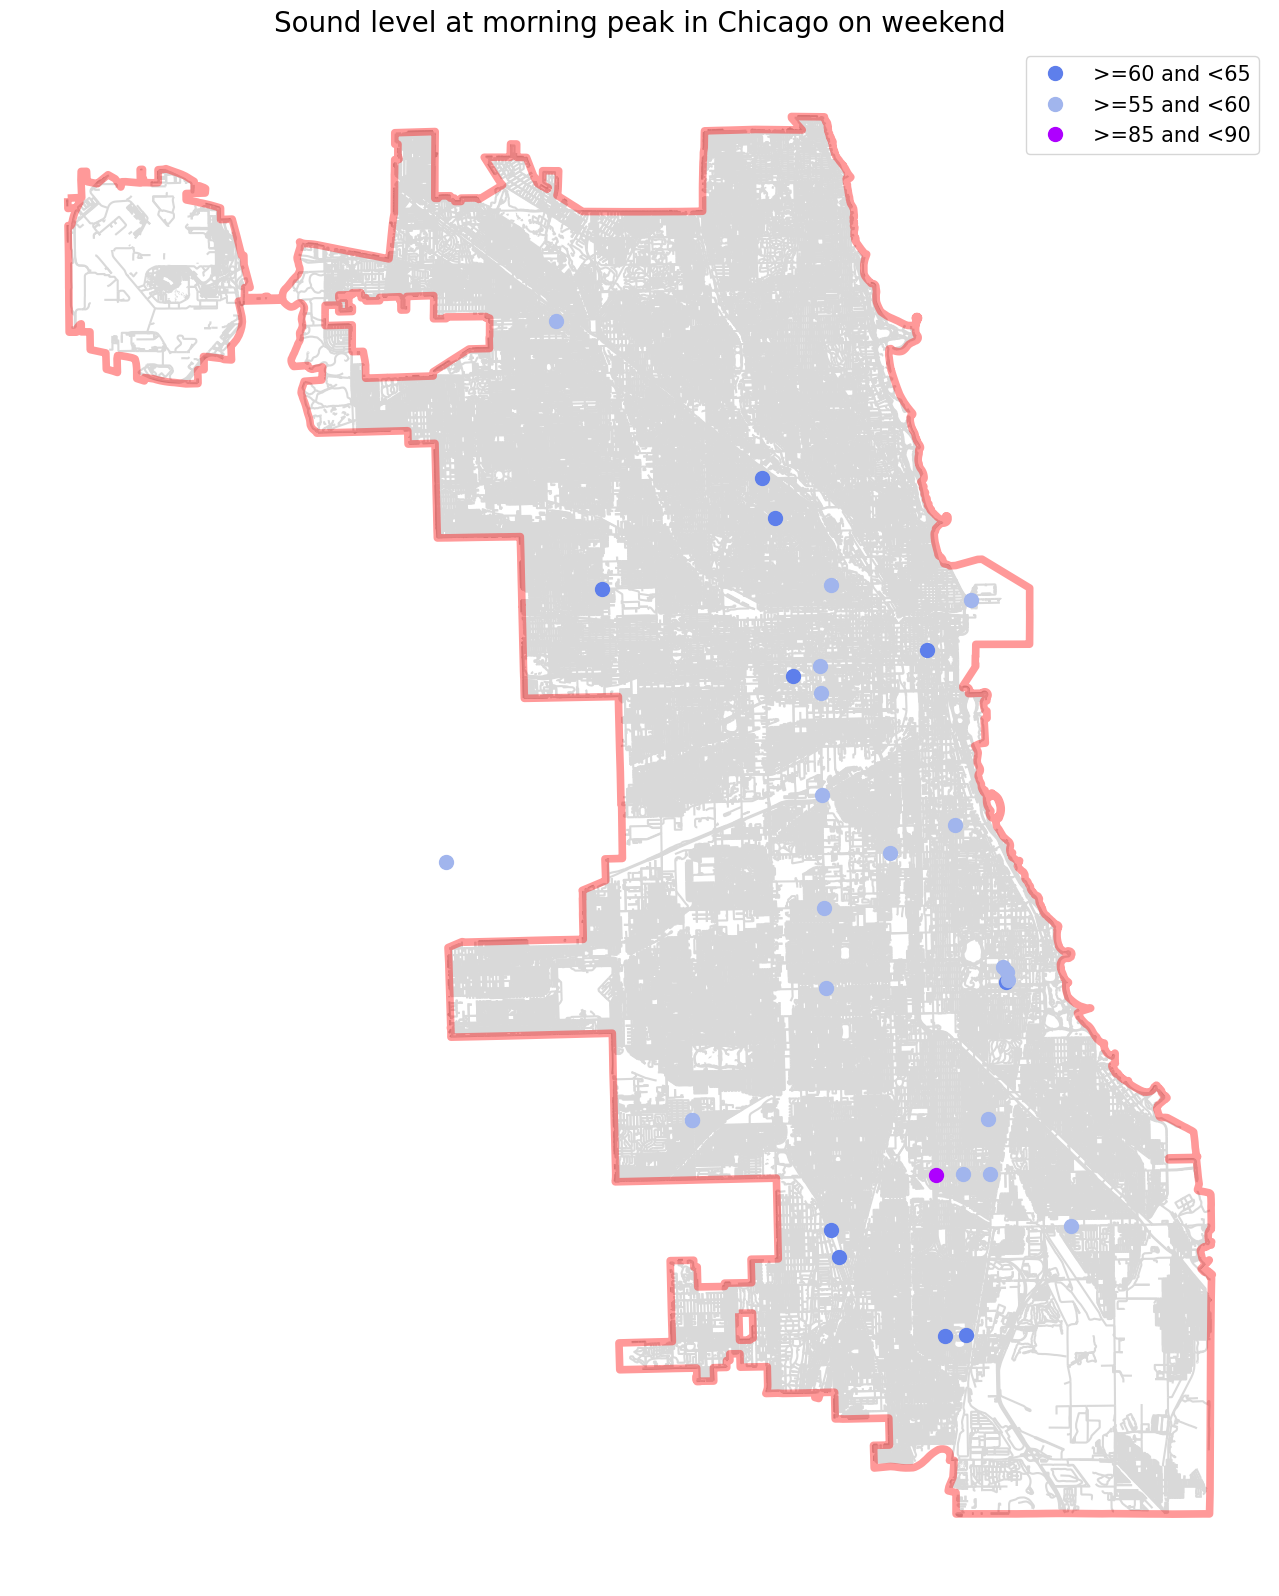

In [14]:
plt.style.use('default')

# Read street information
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)
f, ax = plt.subplots(1, figsize=(20, 20))
# Draw the streets of Chicago
streetmap.plot(ax=ax, color='silver', zorder = 0)

# Read boundary information
boundary = gpd.read_file(Chicago_Boundary_Shapefile)

# Draw the boundaries of Chicago
boundary.plot(ax=ax, color='white', alpha = 0.4, linewidth=5.5, edgecolor='red', zorder = 5)

colorDict={}

for i in range(0, len(df)):
    if df.iloc[i]['average']<50:
        color="#a3a6fa"
        label='<50'
    elif df.iloc[i]['average']>=50 and df.iloc[i]['average']<55:
        color="#FFA0D0"
        label='>=50 and <55'
    elif df.iloc[i]['average']>=55 and df.iloc[i]['average']<60:
        color="#a1b5ed"
        label='>=55 and <60'
    elif df.iloc[i]['average']>=60 and df.iloc[i]['average']<65:
        color="#5e7feb"
        label='>=60 and <65'
    elif df.iloc[i]['average']>=65 and df.iloc[i]['average']<70:
        color="#f4ff75"
        label='>=65 and <70'
    elif df.iloc[i]['average']>=70 and df.iloc[i]['average']<75:
        color = "#ffa43b"
        label='>=70 and <75'
    elif df.iloc[i]['average']>=75 and df.iloc[i]['average']<80:
        color="#B20059"
        label='>=75 and <80'
    elif df.iloc[i]['average']>=80 and df.iloc[i]['average']<85:
        color = "#155c09"
        label='>=80 and <85'
    elif df.iloc[i]['average']>=85 and df.iloc[i]['average']<90:
        color="#ae00ff"
        label='>=85 and <90'
    elif df.iloc[i]['average']>=90 and df.iloc[i]['average']<95:
        color="#db0d0d"
        label='>=90 and <95'
    else:
        print(df.iloc[i]['average'])
        color="#0d89b3"
        label='>=95 and <100'
    if  color in colorDict:
        label=""
    else:
        colorDict[color]=label

    ax.plot(float(df.iloc[i]['lon']),float(df.iloc[i]['lat']), marker='o', label=label, color=color,linestyle='', ms=10, zorder = 10)
#     print(df.iloc[i]['average'],float(df.iloc[i]['lon']),float(df.iloc[i]['lat']))
    
# ax.legend(),set legend
ax.legend()
plt.legend(loc=1,fontsize = 15)

title='Sound level at morning peak in Chicago on weekend'

# Turn off the X and Y axes
ax.set_axis_off()
ax.set_title(title, fontsize = 20, fontdict = {'verticalalignment':'bottom'})